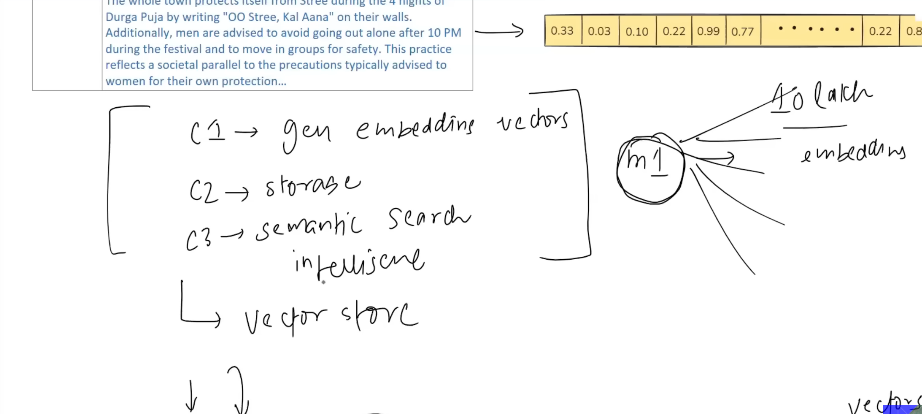

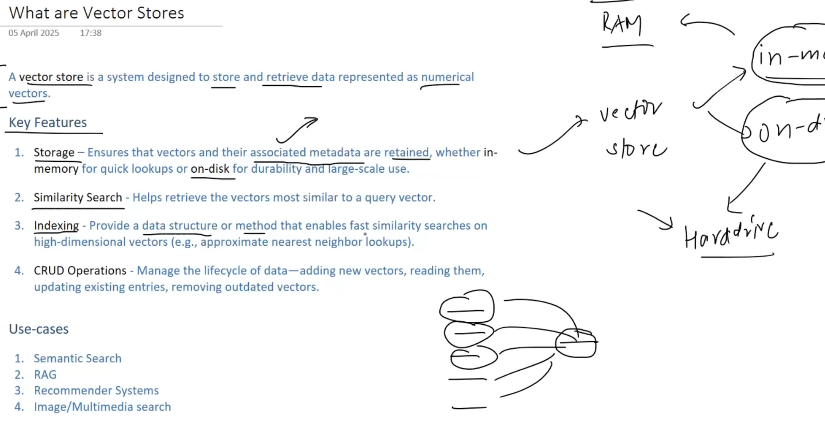

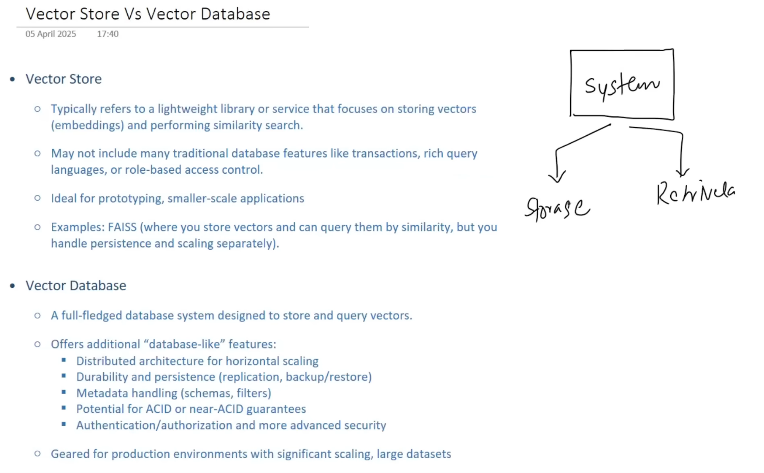

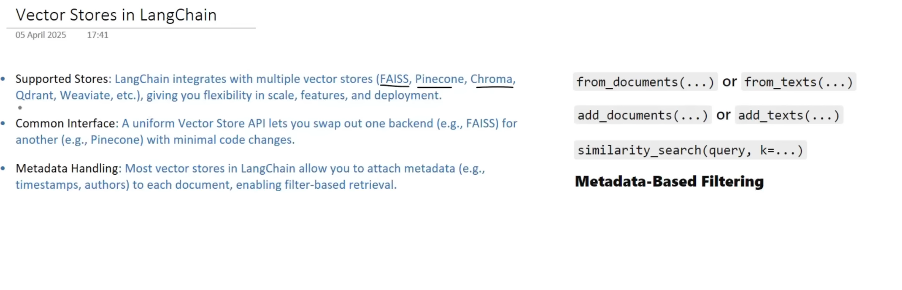

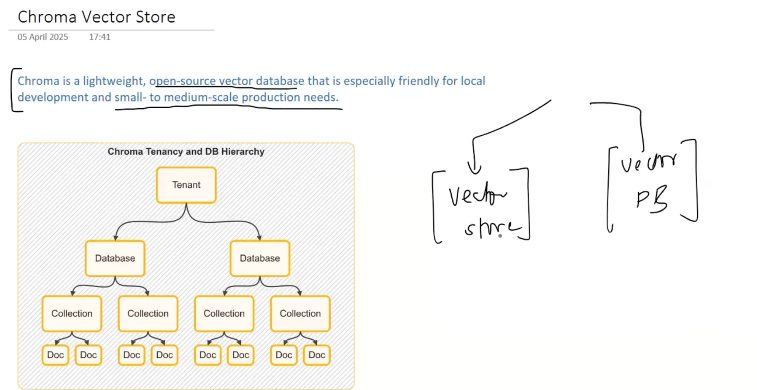



## The Necessity of Vector Stores

Vector Stores are necessary because traditional methods of comparing data, such as simple **keyword matching**, fail to capture the semantic meaning of content.

### Flaws of Keyword Matching

Using a movie recommendation system as an example, keyword matching compares parameters like director, actor, genre, and release date. While simple, this approach often yields illogical or low-quality recommendations.

*   **False Positives (Matching Dissimilar Content):** Two movies like *My Name Is Khan* and *Kabhi Alvida Na Kehna* might be deemed highly similar because they share the same director (Karan Johar), lead actor (Shahrukh Khan), and similar genre/release timeframe, even though their underlying storylines and context are completely different.
*   **False Negatives (Missing Similar Content):** Movies that are conceptually very similar based on their central story (e.g., *Taare Zameen Par* and *A Beautiful Mind*, both featuring a brilliant central character struggling with a specific difficulty) may never be flagged as similar because their directors, actors, and release dates differ significantly.

### The Semantic Solution: Embeddings

To provide quality recommendations, the better approach is to compare the **plot or story** of two movies. This task, comparing the semantic meaning of two pieces of text, is solved using **Embeddings**.

1.  **Transformation:** Embeddings are a technique where a neural network processes a piece of text to understand its meaning and represents that meaning numerically in the form of vectors.
2.  **Vectorization:** Every movie plot (which might be thousands of words long) is converted into a high-dimensional vector (e.g., 512 or 784 dimensions).
3.  **Similarity Calculation:** Once the textual plots are vectors, calculating similarity becomes possible by analyzing the relationship between the numbers. Vectors that are closer together in the coordinate system, meaning they have a low **angular distance** (or high cosine similarity), represent content that is semantically very similar.

### Challenges Solved by Vector Stores

Building a production-ready semantic search system based on vectors presents three major challenges that Vector Stores address:

1.  **Generating Embeddings:** Creating embedding vectors for potentially millions of documents.
2.  **Storage:** Normal relational databases (like MySQL or Oracle) cannot store embedding vectors while also enabling efficient similarity calculation. A specialized system is required.
3.  **Intelligent Semantic Search (Indexing):** Performing a simple linear search (comparing a query vector against 10 lakh vectors) is computationally expensive and slow. Vector stores need a smart, fast retrieval method.

## What is a Vector Store?

A **Vector Store** is a system specifically designed to store and retrieve data that has been represented as numerical vectors.

### Core Features of Vector Stores

Vector Stores provide four key features:

1.  **Storage:** They retain vectors along with their associated **metadata** (like a movie ID or name related to the vector). Storage options include **in-memory** (using RAM for quick lookups, useful for small applications, but non-persistent) or **on-disk** (using hard drives or databases for durability and large-scale use, ensuring persistence).
2.  **Similarity Search:** They allow querying the stored vectors to generate a similarity score against a given query vector, helping retrieve the most similar vectors.
3.  **Indexing:** This feature is crucial for enabling **fast similarity searches** on high-dimensional vectors, improving application speed.
    *   One common technique to achieve speed is through **clustering** (a form of Approximate Nearest Neighbor lookup). Instead of comparing a query vector against all 1 million vectors, the system first compares it against a few (e.g., 10) centroid vectors representing clusters of data. Once the closest centroid is found, the system only searches the vectors within that specific cluster, significantly reducing the number of computations required (e.g., reducing 10 lakh comparisons to about 1 lakh).
4.  **CRUD Operations:** They support standard database operations: **C**reate (add new vectors), **R**etrieve, **U**pdate (existing vectors), and **D**elete (outdated vectors).

## Vector Store vs. Vector Database

The terms Vector Store and Vector Database are often used interchangeably, but there is a distinction.

| Feature | Vector Store (e.g., Faiss) | Vector Database (e.g., Pinecone, Qdrant, Milvus) |
| :--- | :--- | :--- |
| **Core Function** | Storage and retrieval (semantic search). | Storage, retrieval, PLUS advanced features. |
| **Complexity** | Typically a lightweight library or service. | A full-fledged database system. |
| **Features Included** | May lack traditional database features like transactions, rich query languages, and role-based access control. | Offers additional database-like features such as distributed architecture (for scaling), durability/persistence (backups), concurrency control, ACID/near-ACID guarantees, and authentication/authorization. |
| **Use Case** | Ideal for prototyping and smaller-scale applications. | Used in production environments requiring significant scaling or dealing with large datasets. |

**In essence, a Vector Database is a Vector Store that includes extra database-like features**. While every vector database is a vector store, the reverse is not necessarily true.

## Vector Stores in LangChain

LangChain was developed with the understanding that LLM-based applications, particularly RAG systems, would rely heavily on embedding vectors, thus requiring robust support for vector stores and databases.

LangChain provides built-in components (wrappers) for all major vector stores (e.g., Pinecone, Chroma, Qdrant, Weaviate).

### Common Interface

A key design philosophy in LangChain is that these wrappers share the **same method signatures** (a common interface). This means developers can switch between vector stores (e.g., moving from a lightweight vector store like Faiss to a production-scale vector database like Pinecone) without needing to make major changes to the existing code.

Common functions available across different vector stores in LangChain include:

*   `from_documents` or `from_text`: Used to create a vector store.
*   `add_documents` or `add_text`: Used to add new vectors.
*   `similarity_search`: Used to conduct semantic searches.
*   Metadata-based filtering options.

### Example Implementation with Chroma DB

Chroma DB is a popular, open-source vector database that is lightweight and suitable for local development and small-to-medium scale production needs, positioning itself between a simple Vector Store and a full-fledged Vector Database.

When working with Chroma DB via LangChain:

1.  **Organization:** Data in Chroma is organized under a hierarchy: Tenant (user/organization) > Database > **Collection** (equivalent to an RDBMS table) > Document. Each document stores the embedding vector and associated metadata.
2.  **Setup:** Requires importing the vector store (Chroma) and specifying an **embedding function** (like OpenAI Embeddings) to convert the textual content into vectors before storage. The storage itself is typically persisted on disk in a folder, often in a SQLite 3 database format.
3.  **Document Handling:** LangChain uses **Document objects**, which contain the `page_content` (actual text) and `metadata`.
4.  **Searching and Filtering:**
    *   The `similarity_search` function is used, along with the parameter `k` to specify how many top results (most similar documents) should be retrieved.
    *   The `similarity_search_with_score` function returns a score alongside the result; a **lower score indicates a smaller distance and thus higher similarity**.
    *   Filtering can be performed based on the stored metadata (e.g., finding documents where the "team" key matches "Chennai Super Kings").
5.  **Data Management:** Functions like `add_documents`, `update_document` (by providing the document ID), and `delete` (by providing the list of IDs) allow full management of the stored vectors and documents.



## The Core Problem: Lack of Semantic Understanding

The primary problem arises when attempts are made to determine the similarity between pieces of content using **keyword matching**. This approach relies on comparing surface-level parameters like director, actor, genre, and release date.

1.  **False Similarities (False Positives):** Keyword matching often results in recommendations that are logically flawed or illogical because two items might share many keywords but have completely different underlying contexts or storylines (e.g., two movies sharing a director and lead actor but having entirely different plots).
2.  **Missed Similarities (False Negatives):** Conversely, keyword matching fails to identify content that is conceptually very similar (e.g., two movies with radically different actors and directors but a shared central story idea) because the key words do not match.

In essence, keyword matching is too simple and cannot deliver **quality recommendations** because it ignores the **semantic meaning** of the text, such as the plot or story.

## The Conceptual Solution: Embeddings

The solution to comparing the semantic meaning of text is through the use of **Embeddings**.

*   **Transformation:** Embeddings are generated by a neural network that processes a piece of text (like a movie plot) to understand its meaning and represent that meaning numerically in the form of a **high-dimensional vector**.
*   **Similarity Calculation:** Once texts are converted into vectors (numbers), similarity can be calculated by plotting them in a coordinate system. Vectors that are closer together, meaning they have a low **angular distance** (high cosine similarity), are considered semantically similar.

## The Infrastructure Problem and the Vector Store Solution

The process of implementing an embedding-based system introduces three major infrastructure challenges:

| Infrastructure Problem | Vector Store Solution (Features) |
| :--- | :--- |
| **Storage:** Normal relational databases (like MySQL or Oracle) cannot efficiently store vectors while allowing for similarity calculations. | **Storage:** A **Vector Store** is a specialized system designed to **store and retrieve numerical vectors** along with their associated metadata (like document IDs). |
| **Speed:** Performing a simple linear search (comparing a query vector against millions of stored vectors) is computationally heavy and extremely slow. | **Indexing:** Vector Stores implement intelligent methods, such as **clustering** (a form of Approximate Nearest Neighbor lookup), to enable **fast similarity searches**. This dramatically reduces the number of comparisons required, speeding up the application.
| **Data Management:** Need a way to manage vector data (adding, retrieving, updating, and deleting). | **CRUD Operations:** Vector Stores support standard database operations, allowing for the creation, retrieval, updating, and deletion of vectors and their corresponding documents.

A **Vector Store** is thus the specialized system that handles the storage, retrieval, and intelligent search of data represented as numerical vectors, solving the challenges of scaling semantic search. A Vector Database is essentially a Vector Store enhanced with extra features typical of databases, such as distributed architecture and durability.


***

### Minimal Code Implementation for Vector Store (Chroma DB)

This example utilizes the `Chroma` vector store and `OpenAIEmbeddings` for transforming text into numerical vectors.

#### 1. Imports and Setup

The first step involves importing the required vector store wrapper (`Chroma`) and the embedding function (e.g., `OpenAIEmbeddings`). Data in LangChain is handled using **Document objects**.

```python
# Required Imports (assuming dependencies are installed)
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain.schema import Document  # Used for creating the data structure

# --- 1. Define Data (Documents) ---
# Each document contains the actual text (page_content) and metadata.
docs = [
    Document(page_content="Virat Kohli is one of the most successful and consistent batsmen in IPL history.", metadata={"team": "RCB"}),
    Document(page_content="Rohit Sharma is known as 'The Hitman' and captains Mumbai Indians.", metadata={"team": "Mumbai Indians"}),
    Document(page_content="Jasprit Bumrah is a prominent fast bowler.", metadata={"team": "Mumbai Indians"}),
    # ... more documents
]
```
*Note: In the full demonstration, the documents were defined using a dictionary format and then converted to Document objects, and the embedding model needs to be specified.*

#### 2. Vector Store Initialization and Population

The vector store object is created using the `Chroma` class, requiring both the documents and an `embedding function` to convert the text to vectors for storage.

```python
# --- 2. Initialize Embeddings ---
embedding_function = OpenAIEmbeddings()

# --- 3. Create/Populate the Vector Store ---
# The code below handles embedding generation and storage.
vector_store = Chroma.from_documents(
    documents=docs,
    embedding=embedding_function,
    persist_directory="my_chroma_DB", # Directory where vectors are stored on disk
    collection_name="sample" # Data in Chroma is organized into collections
)
```

#### 3. Core Functionality: Semantic Search

The primary purpose of the Vector Store is to perform **semantic search** using the `similarity_search` function. This retrieves documents whose underlying meaning is most similar to the query, regardless of keyword overlap.

```python
# --- 4. Perform Similarity Search ---
query = "Who among these are a bowler"

# Search for the top 2 most similar documents (k=2).
results = vector_store.similarity_search(query, k=2)

# To see the similarity score, use `similarity_search_with_score`.
# A lower score indicates a smaller distance and thus higher similarity.
scored_results = vector_store.similarity_search_with_score(query, k=1)

print(results)
# Output would include Document objects for Jasprit Bumrah and potentially Ravindra Jadeja.
```

#### 4. Metadata Filtering

Vector Stores allow filtering results based on the associated **metadata**.

```python
# --- 5. Filter Results by Metadata ---
# Retrieve documents where the "team" metadata key matches "Chennai Super Kings".
csk_results = vector_store.similarity_search(
    query="", # Query can be empty if only filtering is needed
    filter={"team": "Chennai Super Kings"},
    k=2
)
print(csk_results)
# Output would include Document objects for MS Dhoni and Ravindra Jadeja (if stored).
```

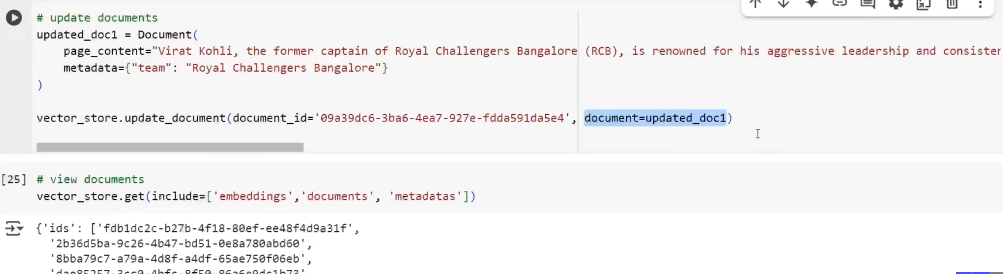

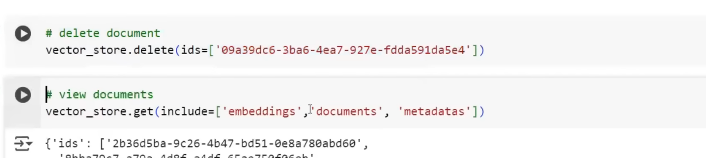